# Setup


In [2]:
# Run some setup code for this notebook. Don't modify anything in this cell.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# reload external python modules;
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Dataset & Present Data

# of training examples =  100
# of features =  2


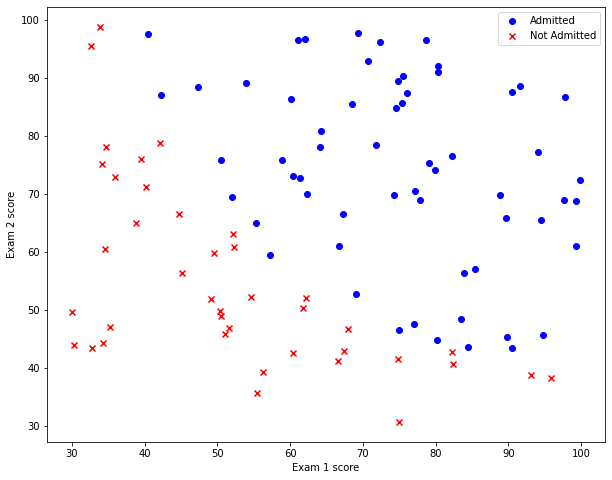

In [3]:
#load the dataset
data = np.loadtxt('p0_data.txt', delimiter=',')
train_X = data[:, 0:2]
train_y = data[:, 2]

# Get the number of training examples and the number of features
m_samples, n_features = train_X.shape
print ("# of training examples = ", m_samples)
print ("# of features = ", n_features)

pos = np.where(train_y == 1)
neg = np.where(train_y == 0)
plt.scatter(train_X[pos, 0], train_X[pos, 1], marker='o', c='b')
plt.scatter(train_X[neg, 0], train_X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

#Code Sigmoid & Cost Function

In [4]:
def sigmoid(z):
    """ Sigmoid function """
    ###################################################################
    # Compute the sigmoid function for the input here.                #
    ###################################################################
    s = None    
    ### YOUR CODE HERE: be careful of the potential underflow or overflow here
    s = np.where(z > 0, 1 / (1 + np.exp(-1 * z)), np.exp(z) / (1 + np.exp(z)))
    
    ##GRADER NOTE: THE OVERFLOW/DIVIDE ERRORS ARE NOT A WORRY (See Reason Below)
    # np.where calculates two arrays (one for each equation) and then selects based on the 
    # true or false condition. So, it ends up only choosing values without overflow/underflow 
    # when putting it into S. This is why this cost function still works despite the warnings. 
    return s
    
# Check your sigmoid implementation
z = np.array([[1, 2], [-1, -2]])
f = sigmoid(z)
print (f)

[[0.73105858 0.88079708]
 [0.26894142 0.11920292]]


In [5]:
def cost_function(theta, X, y):
    """ The cost function for logistic regression """
    #####################################################################################
    # Compute the cost given the current parameter theta on the training data set (X, y)#
    #####################################################################################
    cost = None

    ### YOUR CODE HERE
    hx = sigmoid(theta @ X.T)
    cost = (1 / len(y)) * (-y * np.log(hx) - (1 - y) * np.log(1 - hx))
    cost = np.sum(cost)
    ### END YOUR CODE
    return cost

# Check your cost function implementation

t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_c1 = cost_function(t_theta1, t_X, t_y)
t_c2 = cost_function(t_theta2, t_X, t_y)
print (t_c1)
print (t_c2)

10.000045398899701
4.539889921682063e-05


# Create Gradient Update & Gradient Checking

In [6]:
def gradient_update(theta, X, y):
    """ The gradient update for logistic regression"""
    ###############################
    # Compute the gradient update #
    ###############################
    grad = None

    ### YOUR CODE HERE
    hx = sigmoid(theta @ X.T)
    interim = hx - y
    dTheta = 0
    if interim.ndim == 1:
      dTheta = np.expand_dims(interim, axis=0) @ X
    else:
      dTheta = interim @ X
    grad = (1 / len(y)) * dTheta 
    ### END YOUR CODE
    
    
    return grad[0]

# Check your gradient computation implementation
t_X = np.array([[1, 2, 3], [-1, -2, -3]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10, 0])
t_theta2 = np.array([10, -10, 0])
t_g1 = gradient_update(t_theta1, t_X, t_y)
t_g2 = gradient_update(t_theta2, t_X, t_y)
print (t_g1)
print (t_g2)

[0.9999546  1.9999092  2.99986381]
[4.53978687e-05 9.07957374e-05 1.36193606e-04]


In [7]:
# Check your gradient computation implementation
t_samples, t_features = 100, 10
t_X = np.random.randn(t_samples, t_features)
t_y = np.random.randint(2, size=t_samples) 
t_theta = np.random.randn(t_features)

def my_gradient_checking(t_theta, t_X, t_y):
  epsilon = 1e-4
  calc = gradient_update(t_theta, t_X, t_y)
  literalVector = np.zeros(t_features)
  for i in range(t_features):
    rowArr = np.zeros(t_features)
    rowArr[i] = 1
    literal = (cost_function(t_theta + (epsilon * rowArr.T), t_X, t_y) - cost_function(t_theta - (epsilon * rowArr.T), t_X, t_y)) / (2 * epsilon)
    literalVector[i] = literal
  return np.linalg.norm(calc - literalVector) / (np.linalg.norm(calc) + np.linalg.norm(literalVector))

from scipy import optimize
print('Output of check_grad: %s' % optimize.check_grad(cost_function, gradient_update, t_theta, t_X, t_y))
print(f'My gradient checking implementation output {my_gradient_checking(t_theta, t_X, t_y)}')

Output of check_grad: 1.1866659979614652e-06
My gradient checking implementation output 3.6189403866513805e-10


#Code Gradient Descent & Train Model

[ Iteration 1 ] cost = 0.36995154063931746


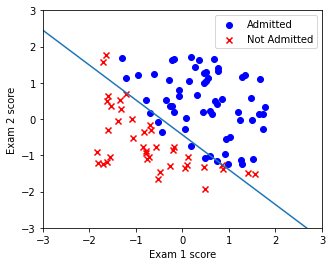

[ Iteration 250000 ] cost = 0.20349770158944241


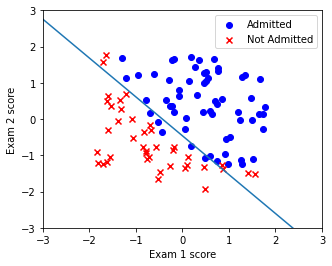

[ Iteration 500000 ] cost = 0.20349770158944


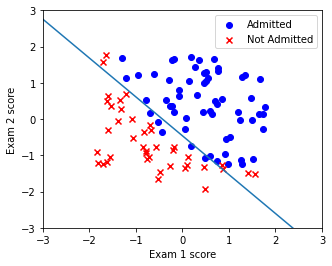

[ Iteration 750000 ] cost = 0.20349770158944


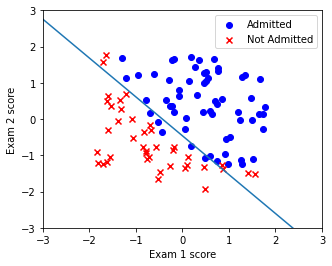

[ Iteration 1000000 ] cost = 0.20349770158944


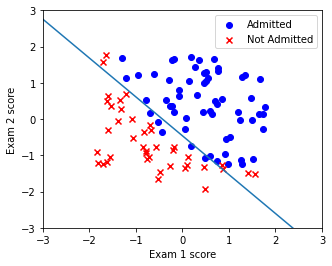

In [14]:
def gradient_descent(theta, X, y, alpha, max_iterations, print_iterations):
    """ Batch gradient descent algorithm """
    #################################################################
    # Update the parameter 'theta' iteratively to minimize the cost #
    # Also visualize the decision boundary during learning          #
    #################################################################

    alpha *= m_samples
    iteration = 0
    
    ### YOUR CODE HERE: 
    X = (X - np.mean(X, axis = 0)) / np.std(X, axis=0)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((X, bias))
    ### END YOUR CODE
    
    
    
    while(iteration < max_iterations):
        iteration += 1
        
        ### YOUR CODE HERE: simultaneous update of partial gradients
        theta = theta - (alpha * gradient_update(theta, X, y))
        ### END YOUR CODE

        
        # For every print_iterations number of iterations
        if iteration % print_iterations == 0 or iteration == 1:
            cost = 0
            
            ### YOUR CODE HERE: calculate the cost
            ### IMPORTANT: The cost function is guaranteed to decrease after 
            ## every iteration of the gradient descent algorithm.
            cost = cost_function(theta, X, y)
            ### END YOUR CODE
            
            print ("[ Iteration", iteration, "]", "cost =", cost)
            plt.rcParams['figure.figsize'] = (5, 4)
            plt.xlim([-3,3])
            plt.ylim([-3,3])
            
            pos = np.where(y == 1)
            neg = np.where(y == 0)
            
            plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
            plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
            plt.xlabel('Exam 1 score')
            plt.ylabel('Exam 2 score')
            plt.legend(['Admitted', 'Not Admitted'])
            t = np.arange(10, 100, 0.1)
            
            ### YOUR CODE HERE: plot the decision boundary
            xLin = np.linspace(-3, 3, 6)
            yLin = -(theta[0]*xLin+theta[2])/theta[1]
            plt.plot(xLin, yLin)
            ### END YOUR CODE 
            
            plt.show()
               
    return theta


### YOUR CODE HERE: initialize the parameters 'theta' to random values; 
### And set up learning rate, number of max iterations, number of iterations for printing intermediate outputs
    
initial_theta = np.random.rand(n_features + 1,)    

alpha_test = 0.0001
max_iter = 1000000
print_iter = 250000    
    
### END YOUR CODE


learned_theta = gradient_descent(initial_theta, train_X, train_y, alpha_test, max_iter, print_iter)

#Predict Function & Final Accuracy

In [15]:
def predict(theta, X):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters """

    ### YOUR CODE HERE: 
    X = (X - np.mean(X, axis = 0)) / np.std(X, axis=0)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((X, bias))
    probabilities = sigmoid(theta @ X.T)
    predicted_labels = np.where(probabilities >= .50, 1, 0)
    
    ### END YOUR CODE
    
    
    ## convert an array of booleans 'predicted_labels' into an array of 0 or 1 intergers
    return probabilities, 1*predicted_labels 

# Computer accuracy on the training dateset 
t_prob, t_label = predict(learned_theta, train_X)
t_precision = t_label[np.where(t_label == train_y)].size / float(train_y.size) * 100
print('Accuracy on the training set: %s%%' % round(t_precision,2))

Accuracy on the training set: 89.0%
